# Check my LES run

In [3]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'wrf'

## select LES run(s) of interest
sim_keyword_col = 'Lx25km_dx100m'

In [4]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] 
var_vec_2d = ['theta','qv','ua','va']
df_gray_1d,df_gray_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1)

df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col)

Loading variables: f(time)
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc
../../output_les/wrf/sandbox/Lx25km_dx200m/WRF_LES_COMBLE-I_Lx25km_dx200m.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
Loading variables: f(time,height)
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc
../../output_les/wrf/sandbox/Lx25km_dx200m/WRF_LES_COMBLE-I_Lx25km_dx200m.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
Loading variables: f(time)
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
Loading variables: f(time,height)
../../output_

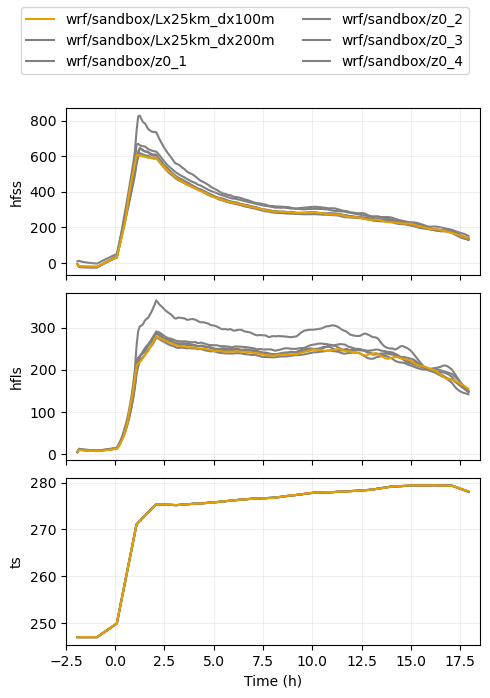

In [5]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d]),var_vec_1d)

Computing wind speed
Computing wind direction


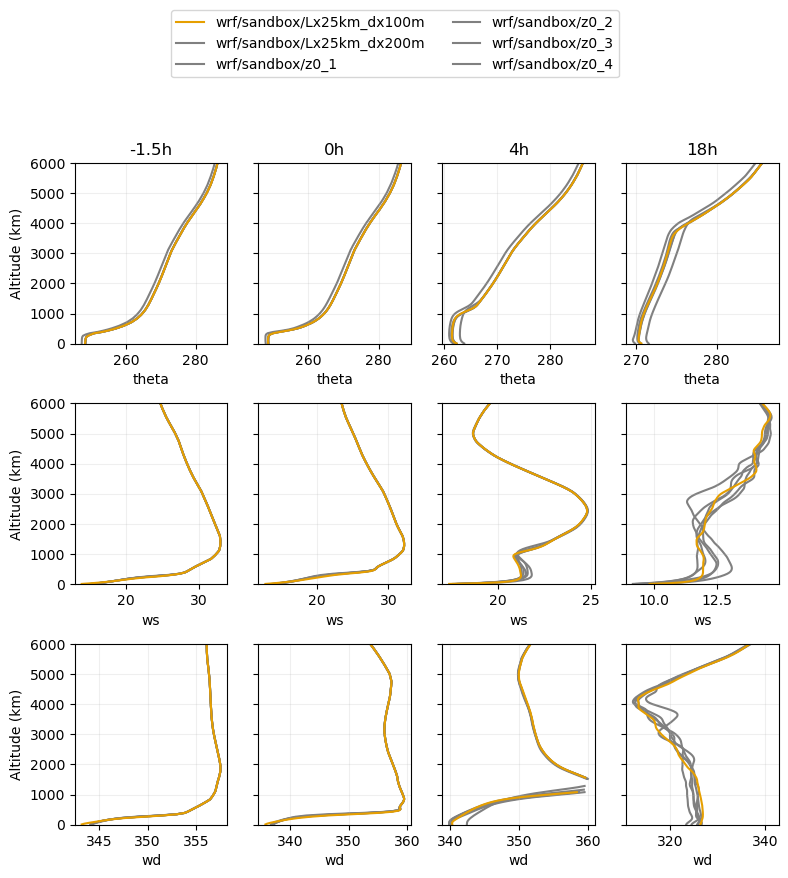

<Figure size 1000x600 with 0 Axes>

In [6]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d]),var_vec = ['theta','ws','wd'],times=[-1.5,0,4,18],z_max=6000)